In [1]:
# Packages
import pandas as pd
import statistics 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

- We will first learn how to open datafiles in a csv (i.e. comma separated values) format. They are read into dataframes in Python which have a table-like structure.

In [2]:
# opening a csv datafile into a dataframe
tweets_df = pd.read_csv('tweets.csv')

# (n is the number of rows you want it to show)
display(tweets_df.head(n = 20))

# structure of a dataframe (prints the number of rows and number of columns of the data frame)
tweets_df.shape

,Unnamed: 0,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,...,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,sentiment_score,sentiment_polarity,trust_score
0,0,4.257743e+08,1.349870e+18,1610668808,DeidreBrock,but this is where we are now - https://t.co/Vw...,TweetDeck,54,1.349860e+18,4.257743e+08,...,True,https://t.co/Asy2B4sr7E,http://dbrockmp.scot,NaN,https://pbs.twimg.com/profile_banners/42577429...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8732115814...,1,2,35
1,1,3.028315e+09,1.349870e+18,1610668854,PeterGrantMP,Retweeting because sometimes a wee bit of unex...,Twitter for iPad,83,9.999000e+03,NaN,...,True,https://t.co/jcBLrrcdYE,http://www.petergrant.scot,NaN,https://pbs.twimg.com/profile_banners/30283145...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/1223157456...,2,2,85
2,2,1.418358e+09,1.349870e+18,1610668936,VotePursglove,🗣️ If you are a victim of domestic abuse you c...,Twitter Web App,140,9.999000e+03,NaN,...,True,http://t.co/CdWygVeOQn,http://www.votepursglove.co.uk,NaN,https://pbs.twimg.com/profile_banners/14183580...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1255509092...,3,2,123
3,3,2.373415e+08,1.349870e+18,1610669156,BellRibeiroAddy,The Tories are coming for workers' rights. It'...,Twitter for iPhone,140,9.999000e+03,NaN,...,True,https://t.co/5pBRF80oIm,https://www.youtube.com/channel/UCar93Fgo3nrEG...,NaN,https://pbs.twimg.com/profile_banners/23734148...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1196793948...,3,0,133
4,4,3.028315e+09,1.349870e+18,1610669182,PeterGrantMP,Some will gloat that Brexit is destroying the ...,Twitter for iPad,279,9.999000e+03,NaN,...,True,https://t.co/jcBLrrcdYE,http://www.petergrant.scot,NaN,https://pbs.twimg.com/profile_banners/30283145...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/1223157456...,2,-1,353
5,5,3.028315e+09,1.349870e+18,1610669209,PeterGrantMP,Waiting for someone on @BBCNewsnight to correc...,Twitter for iPad,139,9.999000e+03,NaN,...,True,https://t.co/jcBLrrcdYE,http://www.petergrant.scot,NaN,https://pbs.twimg.com/profile_banners/30283145...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/1223157456...,2,0,58
6,6,3.028315e+09,1.349870e+18,1610669224,PeterGrantMP,Siri: show me footage of a man detached in eve...,Twitter for iPad,94,9.999000e+03,NaN,...,True,https://t.co/jcBLrrcdYE,http://www.petergrant.scot,NaN,https://pbs.twimg.com/profile_banners/30283145...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/1223157456...,4,2,101
7,7,1.168648e+08,1.349870e+18,1610669242,michelledonelan,Today the first high street pharmacies start v...,Twitter for iPhone,140,9.999000e+03,NaN,...,True,https://t.co/jmRufg3Cgi,http://www.michelledonelan.co.uk,NaN,https://pbs.twimg.com/profile_banners/11686479...,http://abs.twimg.com/images/themes/theme13/bg.gif,http://pbs.twimg.com/profile_images/1205600355...,4,2,177
8,8,4.323967e+08,1.349870e+18,1610669243,KarlTurnerMP,"“I’m Minister for Children and Families, I spe...",Twitter for iPhone,140,9.999000e+03,NaN,...,True,https://t.co/mdiVYWcG68,http://karlturnermp.org.uk,NaN,https://pbs.twimg.com/profile_banners/43239668...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1294701979...,2,0,67
9,9,1.168648e+08,1.349870e+18,1610669256,michelledonelan,It’s disappointing that @LibDems are continuin...,Twitter for iPhone,140,9.999000e+03,NaN,...,True,https://t.co/jmRufg3Cgi,http://www.michelledonelan.co.uk,NaN,https://pbs.twimg.com/profile_banners/11686479...,http://abs.twimg.com/images/themes/theme13/bg.gif,http://pbs.twimg.com/profile_images/1205600355...,3,0,166


(47563, 94)

- We will then transform a variable so we can use it again.

In [16]:
# We can also do this sort of transformations on categorical variables. For example, lets create a variable called 
# 'is_apple'"tweets raw.csv" based on the 'source' variable. This variable will have a 'True' value if the source 
# of the post is an Apple device and a 'False' value otherwise. 

apple_list = ['Twitter for iPhone','Twitter for iPad','Tweetbot for iΟS','Twitterrific for iOS','Twitter for Mac','OS X']
tweets_df['is_apple'] = [False for i in range(tweets_df.shape[0])]
for i in range(tweets_df.shape[0]):
    if tweets_df.loc[i,'source'] in apple_list:
        tweets_df.loc[i,'is_apple'] = True
    
# We can see that more than half of the posts were published from an Apple device
tweets_df['is_apple'].value_counts()


True     29372
False    18191
Name: is_apple, dtype: int64

#### Session 3

1. A bar graph looks similar to a histogram but it is actually quite different. On the x-axis we have some nominal variable and for each level of the variable we will have a bar. On the y-axis we have the value of some statistic we are interested in. The height of the bar will show the value of the statistic for each level of the categorical value. 

<Axes: xlabel='is_quote', ylabel='favorite_count'>

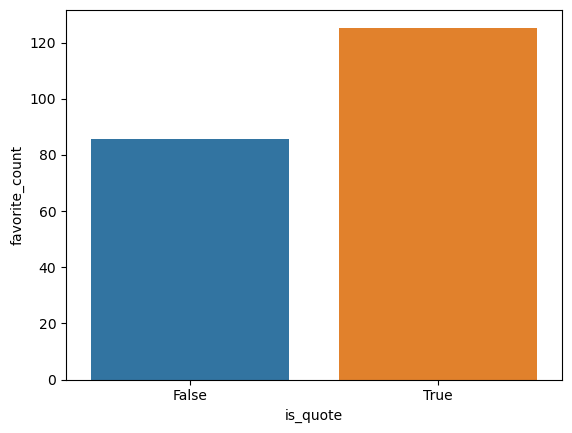

In [13]:
# To create a barplot that shows the average 'favorite_count' for quoted posts and not quoted posts.
sns.barplot(data = tweets_df, x = 'is_quote', y = 'favorite_count', errorbar=None)

<Axes: xlabel='is_quote', ylabel='favorite_count'>

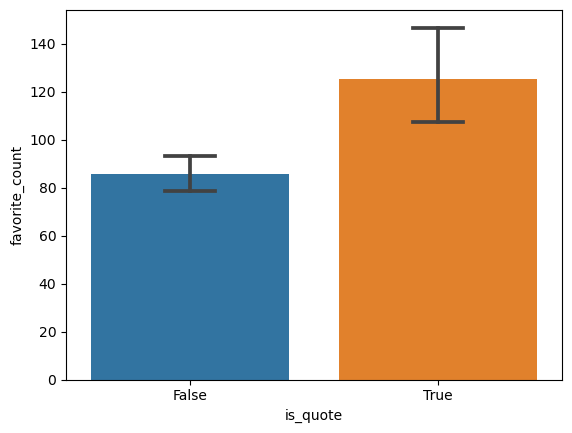

In [14]:
# You can also plot the error bars, which will show the uncertainty (confidence interval) associated 
# with the parameter estimate (here the mean).
sns.barplot(data = tweets_df, x = 'is_quote', y = 'favorite_count', errorbar=('ci', 95), capsize=.2)

In [5]:
# EXERCISE: using the code above, create a barplot with error bars that shows the average retweet count ('retweet_count')
#  for retweeted posts and not retweeted posts ('is_retweet').

In [1]:
# SOLUTION:

2. A boxplot has a similar structure to a barplot with the axis having the same meaning. It shows the median (central line), a measure of variability (the width of the box, which is based on a measure called the interquartile range), and any outliers (noted by the points at the ends of the lines).

<Axes: xlabel='is_quote', ylabel='display_text_width'>

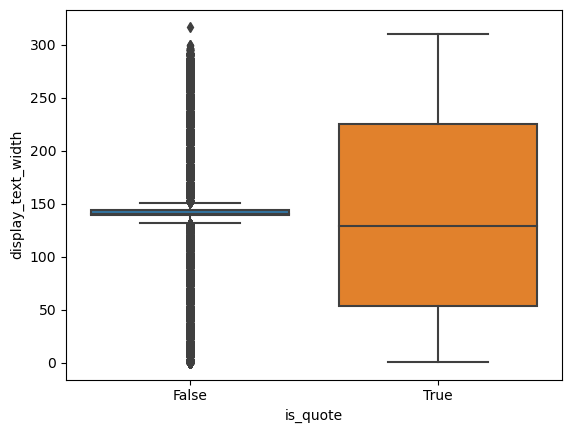

In [7]:
# Creating a boxplot that shows the distribution of post length for quote posts and not quote posts
sns.boxplot(x='is_quote', y='display_text_width', data=tweets_df)

In [8]:
# EXERCISE: using the code above create a boxplot that shows the distribution of 'sentiment_score' for 
# quoted and not quoted posts.

In [3]:
# SOLUTION: 

3. A violin plot is almost identical to a box plot but it shows the distribution of the data in more detail, with thicker areas representing a greater concentration of the data.

<Axes: xlabel='is_quote', ylabel='display_text_width'>

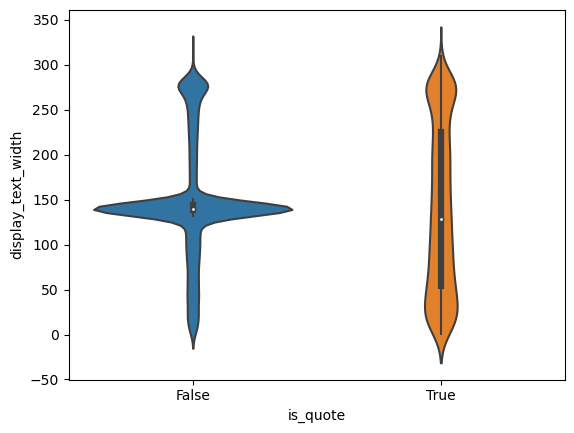

In [10]:
# Creating a violin plot
sns.violinplot(x='is_quote', y='display_text_width', data=tweets_df)

In [11]:
# EXERCISE: using the code above create a violin plot that shows the distribution of the posts' length for posts sent 
# from an Apple device, and for posts sent from a non-Apple device. 

In [2]:
# SOLUTION: 

5. A pie chart will show a statistic for each group as a proportion of the circumference. 


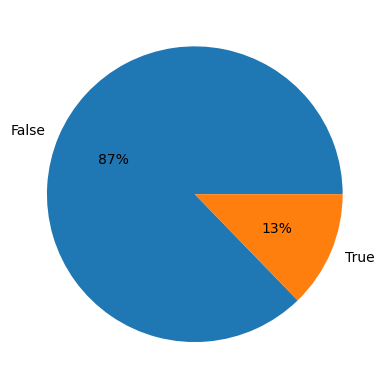

In [18]:
# We first create two lists: one with the frequency count of each value (i.e. the data) and one with the value labels (i.e. the labels)
data = tweets_df['is_quote'].value_counts().sort_index()
labels = data.index

#create pie chart
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

In [ ]:
# EXERCISE: Create a piechart that shows the percentage of times each 'sentiment_score' value appeared. 

In [4]:
# SOLUTION: 


6. We now look at a scatterplot which depicts relations between two variables.  

In [20]:
#reading a new data file.

df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv')
df.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


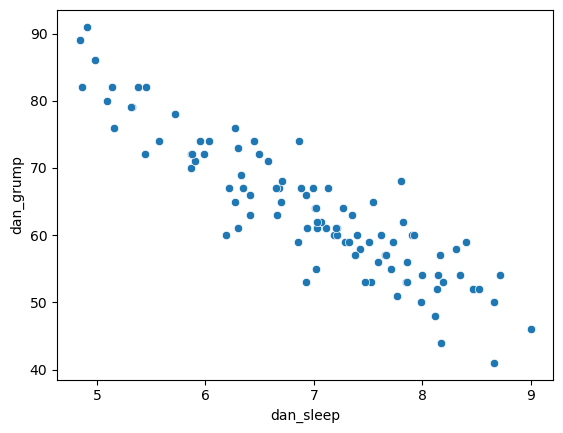

In [21]:
# The goal is to draw a scatterplot displaying the relationship between the amount of sleep that a person called Dan gets 
#(dan.sleep) and how grumpy he is the next day (dan.grump)
ax = sns.scatterplot(x = 'dan_sleep', y = 'dan_grump', data = df)

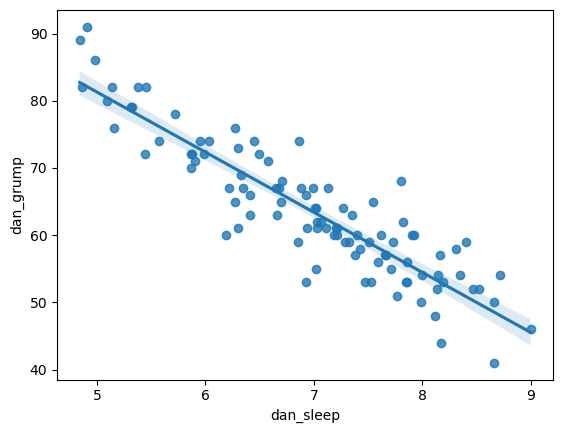

In [22]:
# Let's make that relationship clearer with a line and the associated confidence interval.
ax = sns.regplot(x = 'dan_sleep', y = 'dan_grump', data = df)

In [ ]:
We will get back to scatterplot in the next session.